# CLASSIFICATION WITH QUALITATIVE BANKRUPTCY DATASET

### ABOUT DATA

1. Title: Qualitative_Bankruptcy database

2. Source Information
   	-- Creator:  Martin.A, Uthayakumar.j and Nadarajan.m (uthayakumar17691@gmail.com)
  	-- Guided By: Dr.V.Prasanna Venkatesan
   	-- Date:      February 2014

3. Past Usage:
	The attributes or parameters which we used for collecting the dataset is referred from the paper"The discovery of experts� 
	decision rules from qualitative bankruptcy data using genetic algorithms" by Myoung-Jong Kim*, Ingoo Han.
 
4. Number of Instances: 250 
 
5. Number of Attributes: 6, each corresponding to Qualitative Parameters in Bankruptcy
 
6. Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)
 
     1. Industrial Risk: {P,A,N}
     2. Management Risk: {P,A,N}
     3. Financial Flexibility: {P,A,N}
     4. Credibility: {P,A,N}
     5. Competitiveness: {P,A,N}
     6. Operating Risk: {P,A,N}
     7. Class: {B,NB}

### Internal Risks: 	
i. Industry risk (IR) : 

	- Government policies and International agreements, 
	- Cyclicality, 
	- Degree of competition,				
	- The price and stability of market supply,
	- The size and growth of market demand,	
	- The sensitivity to changes in macroeconomic factors,
	- Domestic and international competitive power, 
	- Product Life Cycle.
    
ii. Management risk(MR): 

	- Ability and competence of management, 
	- Stability of management,
	- The relationship between management/ owner, 
	- Human resources management, 
	- Growth process/business performance, 
	- Short and long term business planning, achievement and feasibility. 
    
iii. Financial Flexibility(FF): 

	- Direct financing, 
	- Indirect financing, 
	- Other financing 
    
iv. Credibility (CR):  

	- Credit history,  
	reliability of information, 
	- The relationship with financial institutes.
    
v. Competitiveness (CO):  

	- Market position, 
	- The level of core capacities, 
	Differentiated strategy, 
    
vi. Operating Risk (OP):  

	- The stability and diversity of procurement, 
	- The stability of transaction, 
	- The efficiency of production, 
	- The prospects for demand for product and service, 
	- Sales diversification,
	- Sales price and settlement condition, 
	- Collection of A/R,
	- Effectiveness of sale network.
 
7. Missing Attribute Values: None
 
8. Class Distribution: [143 instances For Non-Bankruptcy] [107 instances For Bankruptcy]
        Information about the dataset
  	CLASSTYPE: nominal
    
LINK TO DATA SOURCE: https://www.kaggle.com/datasets/jagadeesh23/qualitative-bankruptcy-data-set?resource=download

In [47]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action="ignore")

from glob import glob #library that helps us search for files
import scipy
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier
import random

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from category_encoders import OneHotEncoder,TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve,roc_curve,roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from scipy.special import inv_boxcox
from sklearn.linear_model import QuantileRegressor
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB

#deep learning models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
pd.pandas.set_option('display.max_rows',200)
pd.pandas.set_option('display.max_columns',None)
#pd.options.display.float_format = '{:20,.2f}'.format
sns.set_style('darkgrid')

In [4]:
df = pd.read_excel("/Users/USER/Documents/DATASETS/Qualitative_Bankruptcy.xlsx")

In [5]:
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


(P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)

In [6]:
df = df.replace({'P':'Positive',
                'A':'Average',
                'N':'Negative',
                'B':'Bankruptcy',
                'NB':'Non_Bankruptcy'})

In [8]:
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,Positive,Positive,Average,Average,Average,Positive,Non_Bankruptcy
1,Negative,Negative,Average,Average,Average,Negative,Non_Bankruptcy
2,Average,Average,Average,Average,Average,Average,Non_Bankruptcy
3,Positive,Positive,Positive,Positive,Positive,Positive,Non_Bankruptcy
4,Negative,Negative,Positive,Positive,Positive,Negative,Non_Bankruptcy


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial Risk        250 non-null    object
 1   Management Risk        250 non-null    object
 2   Financial Flexibility  250 non-null    object
 3   Credibility            250 non-null    object
 4   Competitiveness        250 non-null    object
 5   Operating Risk         250 non-null    object
 6   Class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [10]:
df.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,Negative,Negative,Negative,Negative,Negative,Negative,Non_Bankruptcy
freq,89,119,119,94,103,114,143


### SPLIT DATA

In [13]:
train, test = train_test_split(df, test_size=0.2, random_state  = 0)

## DATA EXPLORATION

In [14]:
df = train.copy()

## CHECK FOR WHITESPACES

In [15]:
# IN COLUMN NAMES
[x for x in df.columns if x.startswith(' ') or x.endswith(' ')]

[]

In [16]:
# IN DATA
for i in df.columns:
    print(df[df[i]==' '])

Empty DataFrame
Columns: [Industrial Risk, Management Risk, Financial Flexibility, Credibility, Competitiveness, Operating Risk, Class]
Index: []
Empty DataFrame
Columns: [Industrial Risk, Management Risk, Financial Flexibility, Credibility, Competitiveness, Operating Risk, Class]
Index: []
Empty DataFrame
Columns: [Industrial Risk, Management Risk, Financial Flexibility, Credibility, Competitiveness, Operating Risk, Class]
Index: []
Empty DataFrame
Columns: [Industrial Risk, Management Risk, Financial Flexibility, Credibility, Competitiveness, Operating Risk, Class]
Index: []
Empty DataFrame
Columns: [Industrial Risk, Management Risk, Financial Flexibility, Credibility, Competitiveness, Operating Risk, Class]
Index: []
Empty DataFrame
Columns: [Industrial Risk, Management Risk, Financial Flexibility, Credibility, Competitiveness, Operating Risk, Class]
Index: []
Empty DataFrame
Columns: [Industrial Risk, Management Risk, Financial Flexibility, Credibility, Competitiveness, Operating R

## CARDINALITY

In [23]:
for i in df.columns:
    print(f'Number of unique values in {i}:',df[i].nunique())
    print()
    print()
    print(f'Unique values in {i}:',df[i].unique())
    print()
    print()
    print(f'Frequency of unique values in {i}:\n',df[i].value_counts(normalize=True))
    print('_______________________________________________________________________________________________________________')
    print()

Number of unique values in Industrial Risk: 3


Unique values in Industrial Risk: ['Positive' 'Average' 'Negative']


Frequency of unique values in Industrial Risk:
 Negative    0.365
Average     0.330
Positive    0.305
Name: Industrial Risk, dtype: float64
_______________________________________________________________________________________________________________

Number of unique values in Management Risk: 3


Unique values in Management Risk: ['Positive' 'Average' 'Negative']


Frequency of unique values in Management Risk:
 Negative    0.460
Average     0.275
Positive    0.265
Name: Management Risk, dtype: float64
_______________________________________________________________________________________________________________

Number of unique values in Financial Flexibility: 3


Unique values in Financial Flexibility: ['Average' 'Negative' 'Positive']


Frequency of unique values in Financial Flexibility:
 Negative    0.465
Average     0.290
Positive    0.245
Name: Financial Flex

## NULL VALUES

In [24]:
df.isnull().sum()

Industrial Risk          0
Management Risk          0
Financial Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
dtype: int64

## UNIVARIATE ANALYSIS AND CARDINALITY

In [25]:
cat = df.select_dtypes('O')

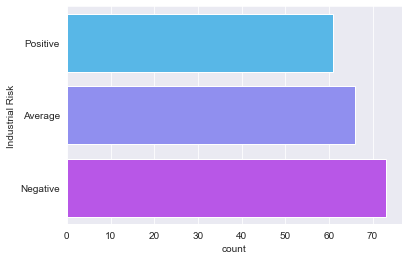

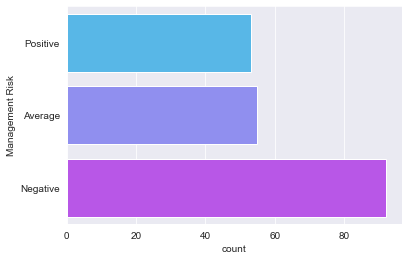

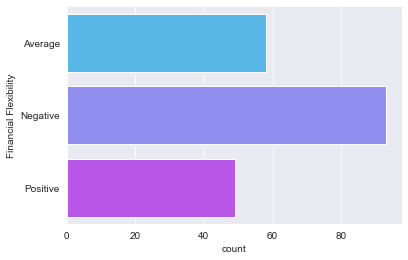

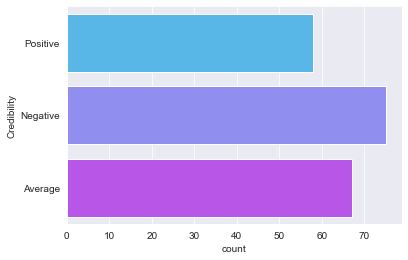

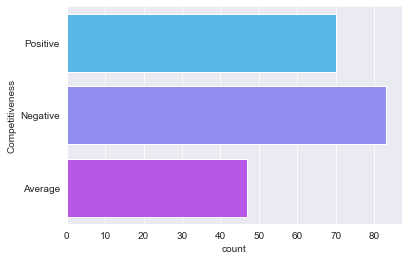

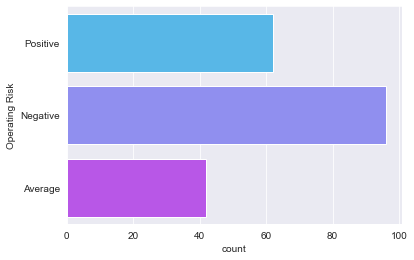

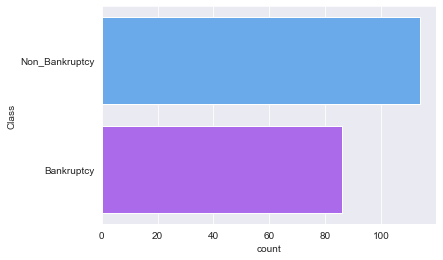

In [27]:
for i in cat:
    plt.figure()
    sns.countplot(y = df[i], palette = 'cool')

## RELATIONSHIP WITH TARGET

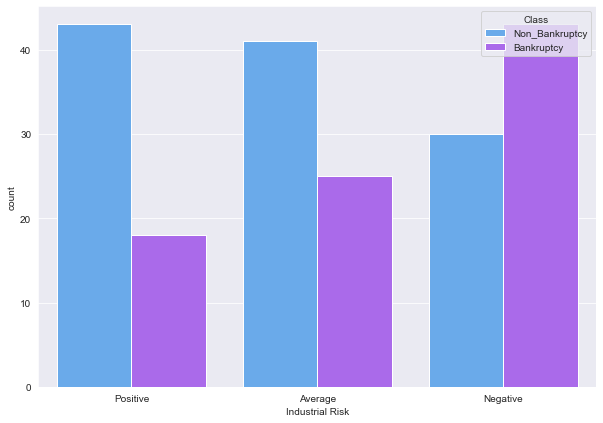

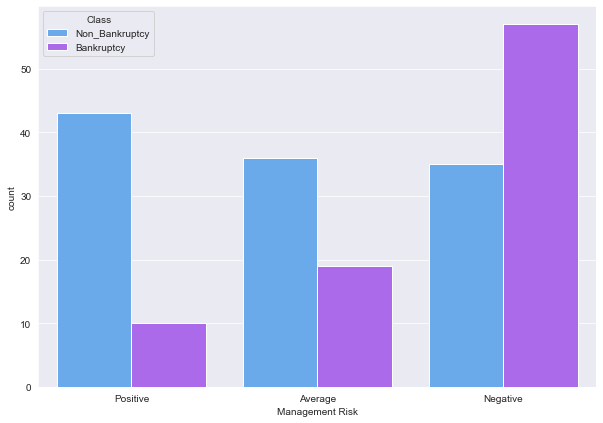

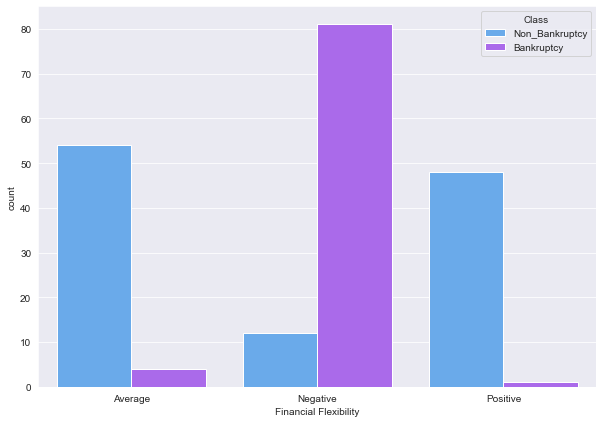

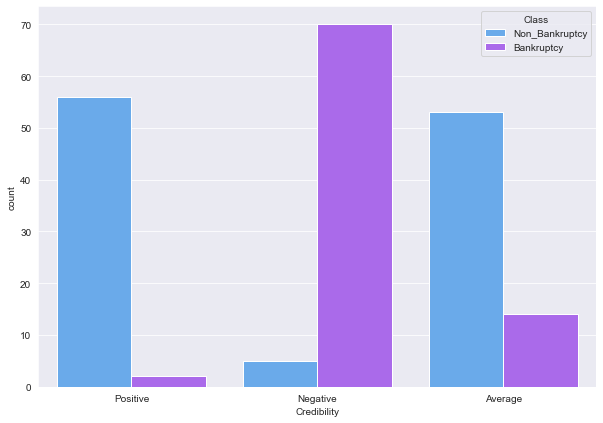

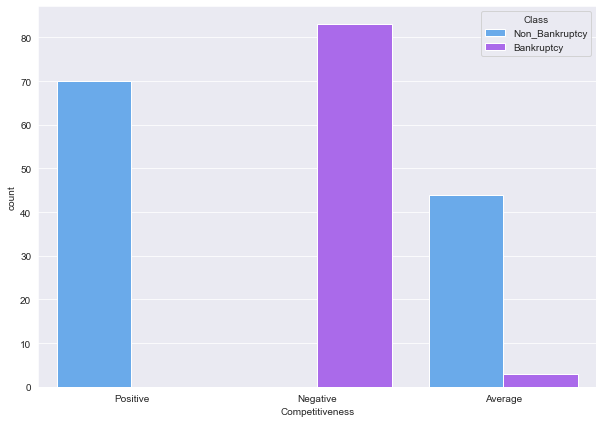

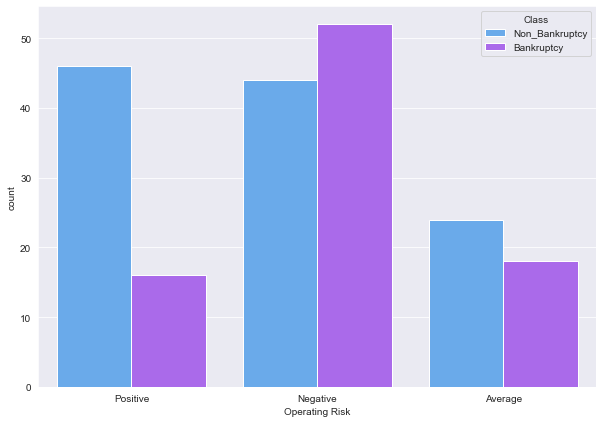

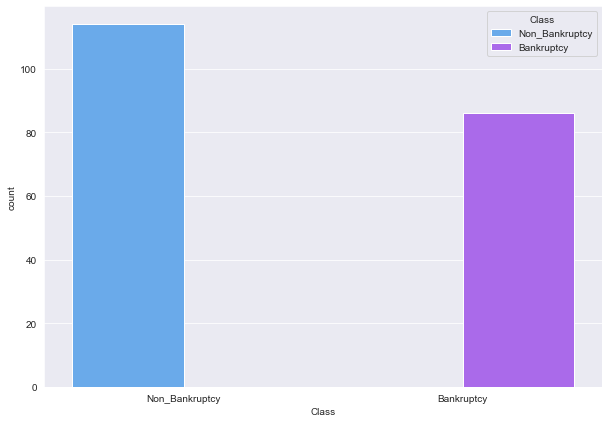

In [36]:
for i in cat:
    plt.figure(figsize=(10,7))
    sns.countplot(data=df,x=i, hue='Class', palette = 'cool')
    

In [39]:
for i  in cat:
    print(pd.crosstab(df[i], df['Class']))
    print()
    print()

Class            Bankruptcy  Non_Bankruptcy
Industrial Risk                            
Average                  25              41
Negative                 43              30
Positive                 18              43


Class            Bankruptcy  Non_Bankruptcy
Management Risk                            
Average                  19              36
Negative                 57              35
Positive                 10              43


Class                  Bankruptcy  Non_Bankruptcy
Financial Flexibility                            
Average                         4              54
Negative                       81              12
Positive                        1              48


Class        Bankruptcy  Non_Bankruptcy
Credibility                            
Average              14              53
Negative             70               5
Positive              2              56


Class            Bankruptcy  Non_Bankruptcy
Competitiveness                            
Average       

## SPLITTING AND MODEL BUILDING

In [40]:
xtrain = train.drop(['Class'], axis=1)
ytrain = train.Class

xtest = test.drop(['Class'], axis=1)
ytest = test.Class

In [41]:
ohe = OneHotEncoder()

In [42]:
xtrain = ohe.fit_transform(xtrain)

xtest = ohe.transform(xtest)

In [43]:
le = LabelEncoder()

In [44]:
ytrain = le.fit_transform(ytrain)

ytest = le.transform(ytest)

In [48]:
models = []


models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('MLP', MLPClassifier()))
models.append(('Adaboost', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('Forest', RandomForestClassifier()))
models.append(('ExT', ExtraTreesClassifier()))

<IPython.core.display.Javascript object>

In [73]:
cv_results = []
names = []

for name,model in models:
    names.append(name)
    kfold = KFold(n_splits = 3)
    cv = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='f1')
    
    cv_results.append(cv)
    print(f'{name}:', 'mean:',cv.mean(),'std:',cv.std())

LDA: mean: 0.9869705286990998 std: 0.000756856219429143
KNN: mean: 0.9912280701754387 std: 0.012405382126079766
Tree: mean: 1.0 std: 0.0
NB: mean: 0.9911899379818002 std: 0.006269969447176658
SVC: mean: 0.9957805907172995 std: 0.005967145832797902
MLP: mean: 0.9914529914529915 std: 0.012087295404898257
Adaboost: mean: 0.9909496728429034 std: 0.006443223181127333
GBM: mean: 0.9908400777965994 std: 0.006506148107501595
Forest: mean: 1.0 std: 0.0
ExT: mean: 1.0 std: 0.0


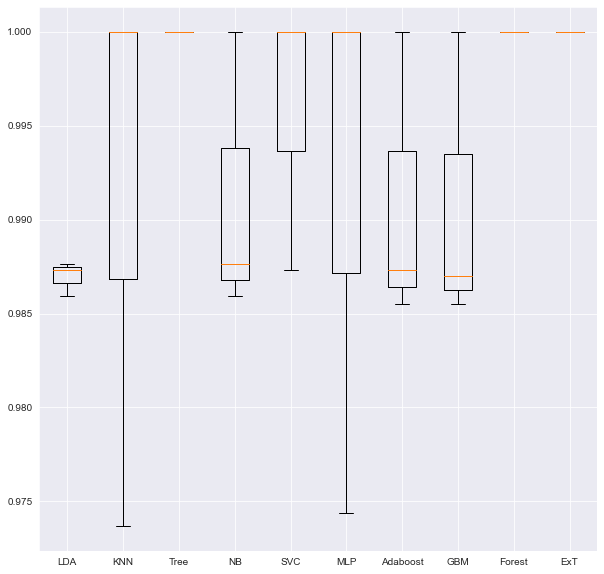

In [74]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111)

plt.boxplot(cv_results)
ax.set_xticklabels(names);

In [75]:
## TESTING
model = LinearDiscriminantAnalysis()
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
print(classification_report(ypred, ytest))


              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.97      0.98        30

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

